In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('train.csv')
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [157]:
y = df.TARGET

C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

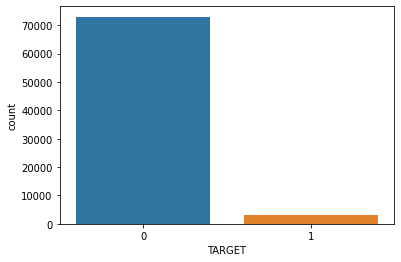

In [158]:
sns.countplot(y)

we can see we are having an imbalanced data set

since there are more variables we first do feature selection to remove unwanted columns

### over sampling

### Feature Selection Using Variance

In [159]:
from sklearn.feature_selection import VarianceThreshold

vari = VarianceThreshold(threshold=0.95)

In [160]:
vari.fit(df)

VarianceThreshold(threshold=0.95)

In [161]:
col = [col for col in df.columns if col not in df.columns[vari.get_support()]]

In [162]:
len(col)

187

we have 34 columns to be removed

In [163]:
df.drop(col,axis=1,inplace=True)

In [164]:
### Feature selection Using Pearson Corelation

we can able to find the columns since the data set has huge colums , lets write a function

In [165]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,num_var5,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var41_0,num_var42,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,var21,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,3,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.00,0.0,0.00,0.0,99,0,0,0.

In [166]:
def correlate(dataset,threshold):
    col_cor= set()
    cor_mat = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range (i):
            if abs(cor_mat.iloc[i,j])> threshold:
                col_cor.add(cor_mat.columns[i])
    return col_cor
            

In [167]:
col = correlate(df,0.80)

In [168]:
print(len(col))

86


we can see over 88 col are not needed here

In [169]:
df.drop(col,axis=1, inplace=True)

In [170]:
df.drop('ID',axis=1, inplace=True)

In [171]:
pd.set_option("display.max_columns",500)
df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,num_var5,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_var30_0,num_var30,num_var35,num_var37_med_ult2,num_var39_0,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var14,saldo_var17,saldo_var20,saldo_var26,saldo_var30,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_venta_var44_hace3,var21,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_op_var40_comer_ult1,num_op_var41_efect_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,-1523.199277,33.212865,86.208265,72.363067,3.559130,0.412946,3.160715,68.205140,5.477676,1.999171,0.057024,1.601144,0.093923,2.858840,3.371863,2.382873,3.299369,0.263536,2.724941,4.844911e+01,1028.468235,0.414475,141.226784,6.021616e+03,4993.752970,1.493682e+03,0.513023,69.096200,1.834059e+02,27.399456,76.081633,1.367967e+04,3.345941,12.532333,0.670876,36.907194,96.352738,40.449079,2.630887e+05,4.867140e+07,5.130229e+06,1.315443e+05,9.208103e+06,4.998685e+06,2.630887e+06,1.315443e+05,5.261773e+05,5.261773e+05,6.577217e+05,1.315443e+05,5.524862e+06,2823.949089,619.585010,31.105323,2.985793,0.048145,2.721454,1.276982e+02,13.964581,1.167825e+02,46.180243,0.158210,12.569401,8.541207e+02,1.932954e+03,1.874808,2.512678,1.913616,2.789772,0.314701,3.787137,32.549329,0.187964,1.298698,1.184886,0.560655,3.044238,4.024665,0.074980,0.719416,0.39281

C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWar

C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWar

C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWar

C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


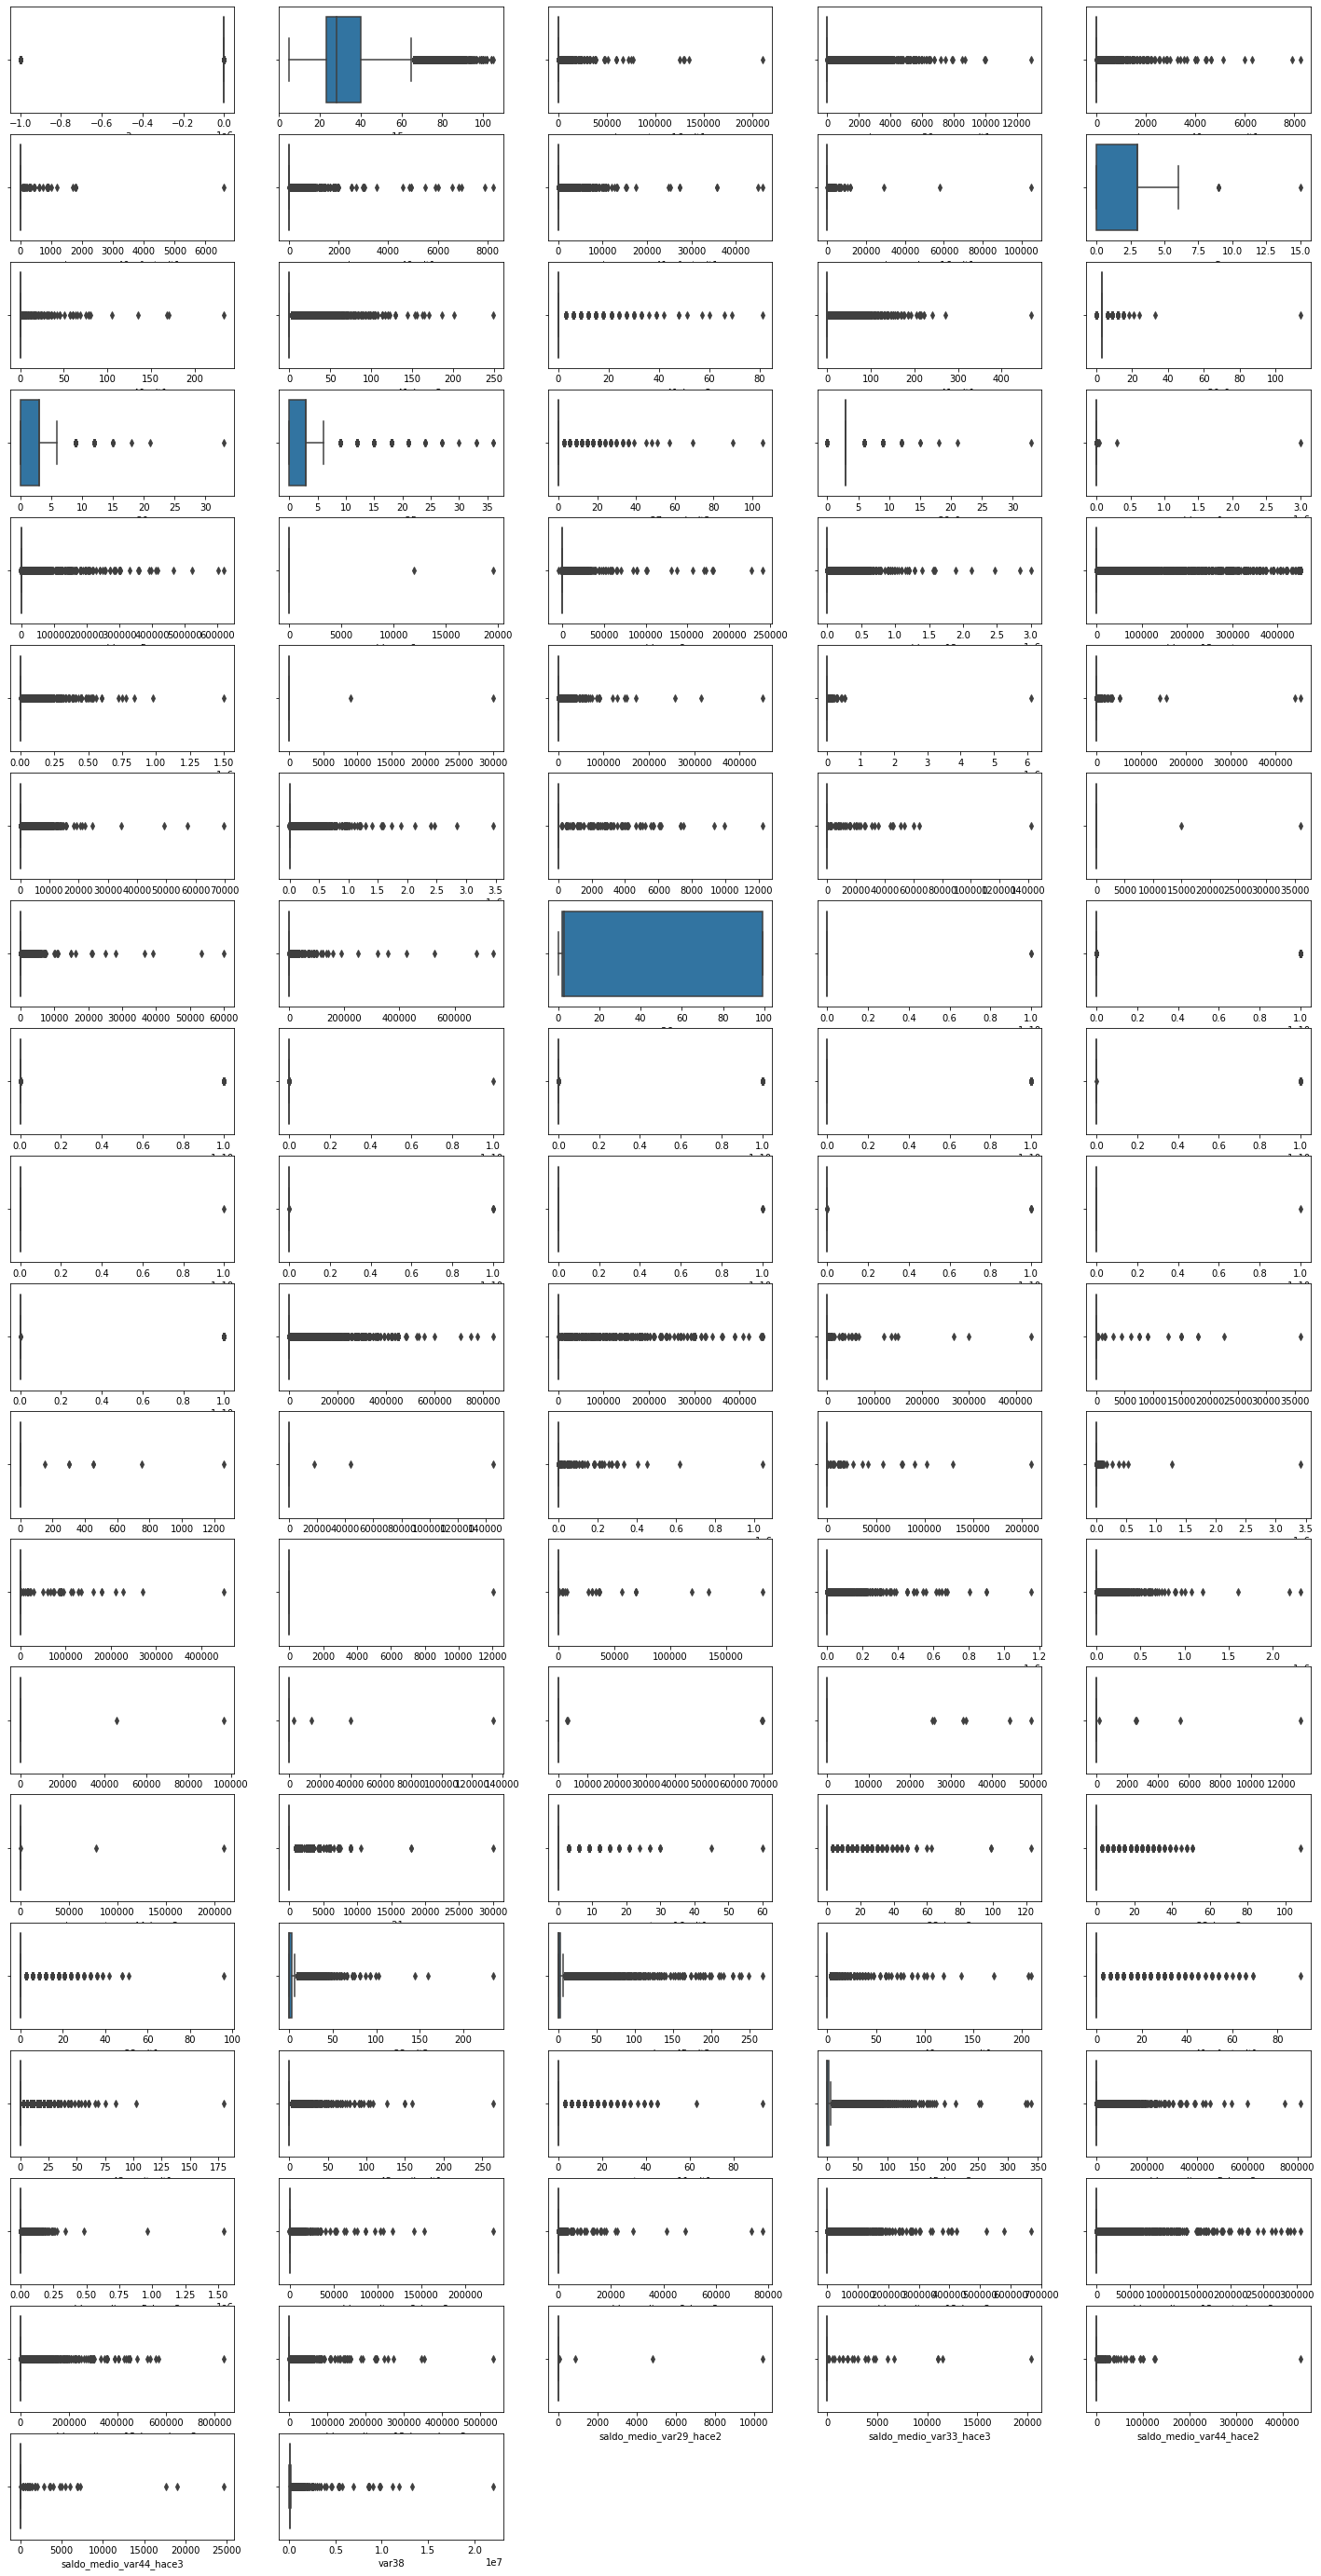

In [173]:
import seaborn as sns
plt.figure(figsize=(25,50))

for i in enumerate(df.columns):
    plt.subplot(20,5,i[0]+1)
    sns.boxplot(df[i[1]])

In [174]:
df['var3'].replace(-999999,2,inplace=True)

find missing Values

lets fix this imbalanced data set

### Over Sampling

this methods even out the number of 0 classified targets with target classified as 1 by increasing the records 

In [175]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X_tr,Y_tr = smk.fit_resample(df,y)

In [176]:
X_tr.shape,Y_tr.shape

((141828, 97), (141828,))

lets Do one More feature selection

In [177]:
"""sns.heatmap(X_tr.corr())"""

'sns.heatmap(X_tr.corr())'

In [178]:
## RFECV
"""
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFECV(estimator=model,cv=2,step=1,scoring='accuracy',n_jobs=3)
rfe.fit(X_tr,Y_tr)
"""

"\nfrom sklearn.feature_selection import RFECV\nfrom sklearn.ensemble import RandomForestClassifier\n\nmodel = RandomForestClassifier(random_state=42)\nrfe = RFECV(estimator=model,cv=2,step=1,scoring='accuracy',n_jobs=3)\nrfe.fit(X_tr,Y_tr)\n"

In [179]:
"""from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state =42)

cros = cross_val_score(X_tr,Y_tr,estimator=model,cv=3,scoring='accuracy')"""

"from sklearn.model_selection import cross_val_score\nfrom sklearn.ensemble import RandomForestClassifier\nmodel = RandomForestClassifier(random_state =42)\n\ncros = cross_val_score(X_tr,Y_tr,estimator=model,cv=3,scoring='accuracy')"

In [180]:
"""print(X_tr.columns[rfe.support_])
print(len(X_tr.columns[rfe.support_]))"""

'print(X_tr.columns[rfe.support_])\nprint(len(X_tr.columns[rfe.support_]))'

In [181]:
"""plt.figure()
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.plot(range(1,len(rfe.grid_scores_)+1),rfe.grid_scores_)"""

"plt.figure()\nplt.xlabel('Features')\nplt.ylabel('Accuracy')\nplt.plot(range(1,len(rfe.grid_scores_)+1),rfe.grid_scores_)"

In [182]:
X = X_tr[X_tr.columns[rfe.support_]]
X

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,num_var5,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_var30_0,num_var30,num_var35,num_var37_med_ult2,num_var39_0,saldo_var1,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var14,saldo_var17,saldo_var20,saldo_var26,saldo_var30,saldo_var32,saldo_var33,saldo_var37,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,var21,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_op_var40_comer_ult1,num_op_var41_efect_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,2,23,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0,0,0,0,0,3,0,0,0,3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,99,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0,0,0,0,0,6,3,3,0,3,0.0,0.000000,0.000000,0.0,300.0,0.0,0.0,0.0,0.0,0.000000,300.000000,0.0,0.0,0.000000,0.0,3,-1.0,0.0,0.0,0.0,0,0,0,0,0.0,300.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,88.890000,0.000000,0.000000,0.0,122.22,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,3,0,0,0,0,3,3,3,0,3,0.0,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.000000,0.0,0.0,0.000000,0.0,99,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,0.180000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.000000,195.000000,0.0,0.0,0.0,0.00000,0.0,3,0,0,0,9,3,3,9,6,3,0.0,70.620000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,70.620000,0.0,0.0,34.950000,0.0,2,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,3,0,0,3,15,0,0,0,0,0,3,186.090000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0,0,0,0,0,6,3,3,0,3,0.0,0.000000,0.000000,135003.0,0.0,0.0,0.0,0.0,0.0,0.000000,135003.000000,0.0,0.0,0.000000,0.0,1,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,135003.000000,270003.000000,0.0,0.0,0.0,0,0,3,0,6,9,0,0,0,3,6,3,0,3.000000,0.300000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141823,2,35,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0,0,0,0,0,3,0,0,0,3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,99,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00

In [183]:
from xgboost import XGBClassifier

mod = XGBClassifier(random_state = 42)

mod.fit(X_tr,Y_tr)

C:\Python 38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
test_df = pd.read_csv('test.csv')
test_df1 = test_df[df.columns]
pre = mod.predict(test_df1)

In [185]:
subm = pd.read_csv('sample_submission.csv')
subm.TARGET = pre

In [186]:
subm

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,1


In [187]:
subm.to_csv('sample_submission.csv',index=False)